<a href="https://colab.research.google.com/github/OKleg/CV_labs/blob/main/CV_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Частотная фильтрация.
Для частотной фильтрации использовать БПФ (средствами OpenCV)

Показать пошаговое применение частотных сглаживающих и повышающих резкость фильтров:
Показать в сравнении идеальный фильтр, Батерворта и гауссиан
# Что нужно показывать!!!

* Исходное изображение.
* Спектр изображения
* Частотный фильтр для сглаживания
* Результат наложения в виде спектра и в виде изображения
* Частотный фильтр для повышения резкости
* Результат наложения в виде спектра и в виде изображения

# Исходное изображение.

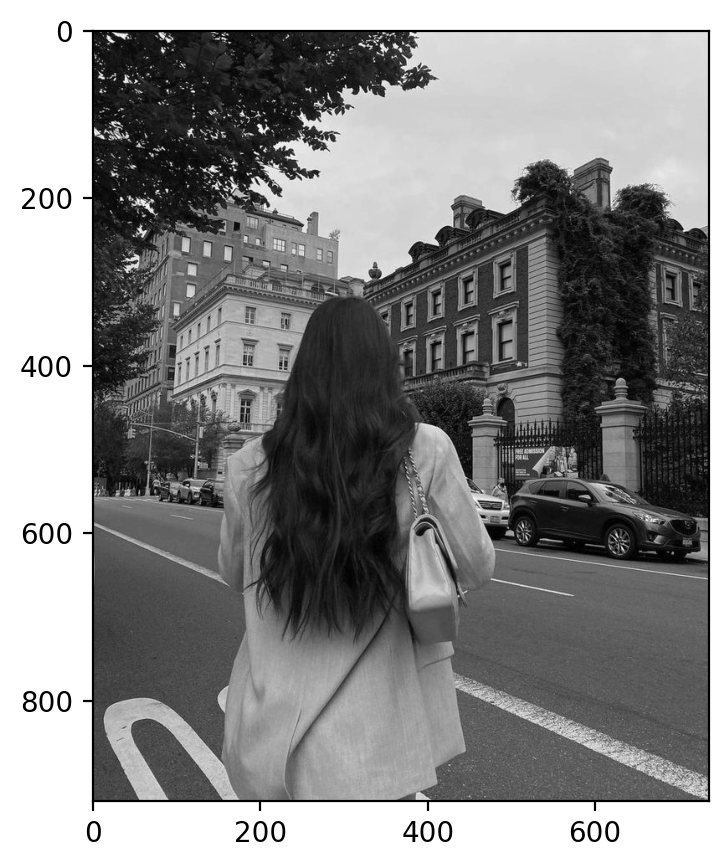

In [168]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

img = cv2.imread('pict.jpg', 0)
plt.imshow(img, cmap='gray')

# Спектр изображения

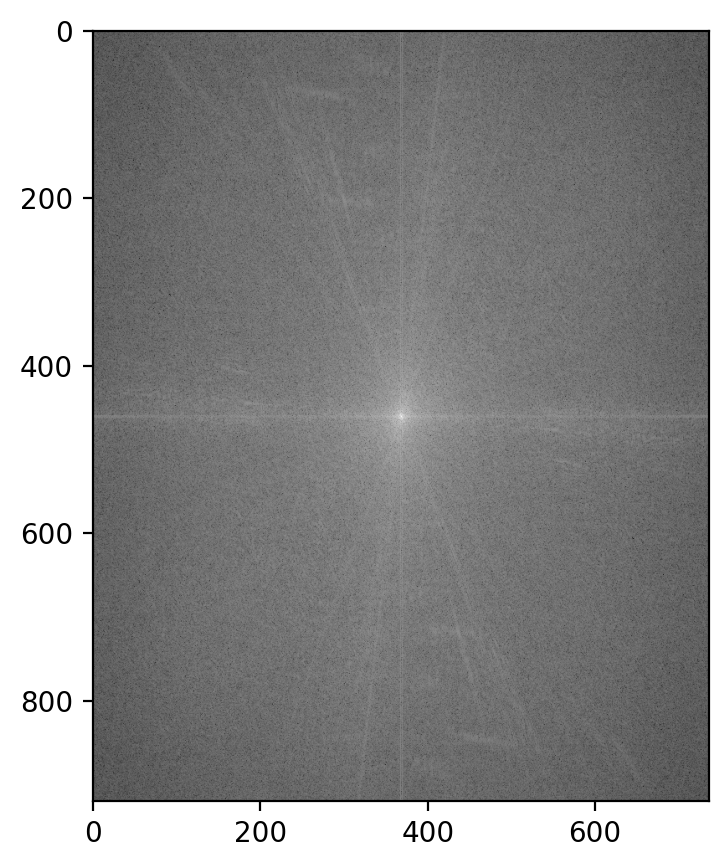

In [169]:
def spectr(img):
  #Быстрое преобразование Фурье
  dft = np.fft.fft2(img)
  #Сдвиг БПФ в центр спектра
  dft_shift = np.fft.fftshift(dft)
  return dft_shift

 # Логарифмическое преобразование
def magnitude(spec):
  return 20*np.log(np.abs(spec))
  #return np.abs(spec) ** 0.1
spec = spectr(img)
plt.imshow(magnitude(spec), "gray")

In [170]:
#
def D(i, j, Rows, Cols):
  return np.sqrt((i - Rows/2)**2 + (j - Cols/2)**2)

# Идеальный
def ILFF(Rows, Cols, D0):
  rez = np.zeros((Rows, Cols))
  for i in range(Rows):
    for j in range(Cols):
      rez[i][j] = int(D(i, j, Rows, Cols) <= D0)
  return rez
def IHFF(Rows, Cols, D0):
  rez = np.zeros((Rows, Cols))
  for i in range(Rows):
    for j in range(Cols):
      rez[i][j] = int(D(i, j, Rows, Cols) > D0)
  return rez

# Баттерворт
def BLFF(Rows, Cols, D0, n):
  rez = np.zeros((Rows, Cols))
  for i in range(Rows):
    for j in range(N):
      rez[i][j] = 1/(1+(D(i,j,Rows,Cols)/D0)**(2*n))
  return rez
def BHFF(Rows, Cols, D0, n):
  rez = np.zeros((Rows, Cols))
  for i in range(Rows):
    for j in range(Cols):
      rez[i][j] = 1/(1+(D0/D(i,j,Rows,Cols))**(2*n)) if D(i,j,Rows,Cols) != 0 else 0
  return rez

# Гаусс
def GLFF(Rows, Cols, D0):
  rez = np.zeros((Rows, Cols))
  for i in range(Rows):
    for j in range(Cols):
      rez[i][j] = np.exp(-(D(i,j,Rows,Cols)**2/(2*D0**2)))
  return rez
def GHFF(Rows, Cols, D0):
  rez = np.zeros((Rows, Cols))
  for i in range(Rows):
    for j in range(Cols):
      rez[i][j] = 1-np.exp(-(D(i,j,Rows,Cols)**2/(2*D0**2)))
  return rez

# Частотный фильтр для сглаживания

<ipython-input-169-c957227c10be>:10: RuntimeWarning: divide by zero encountered in log
  return 20*np.log(np.abs(spec))


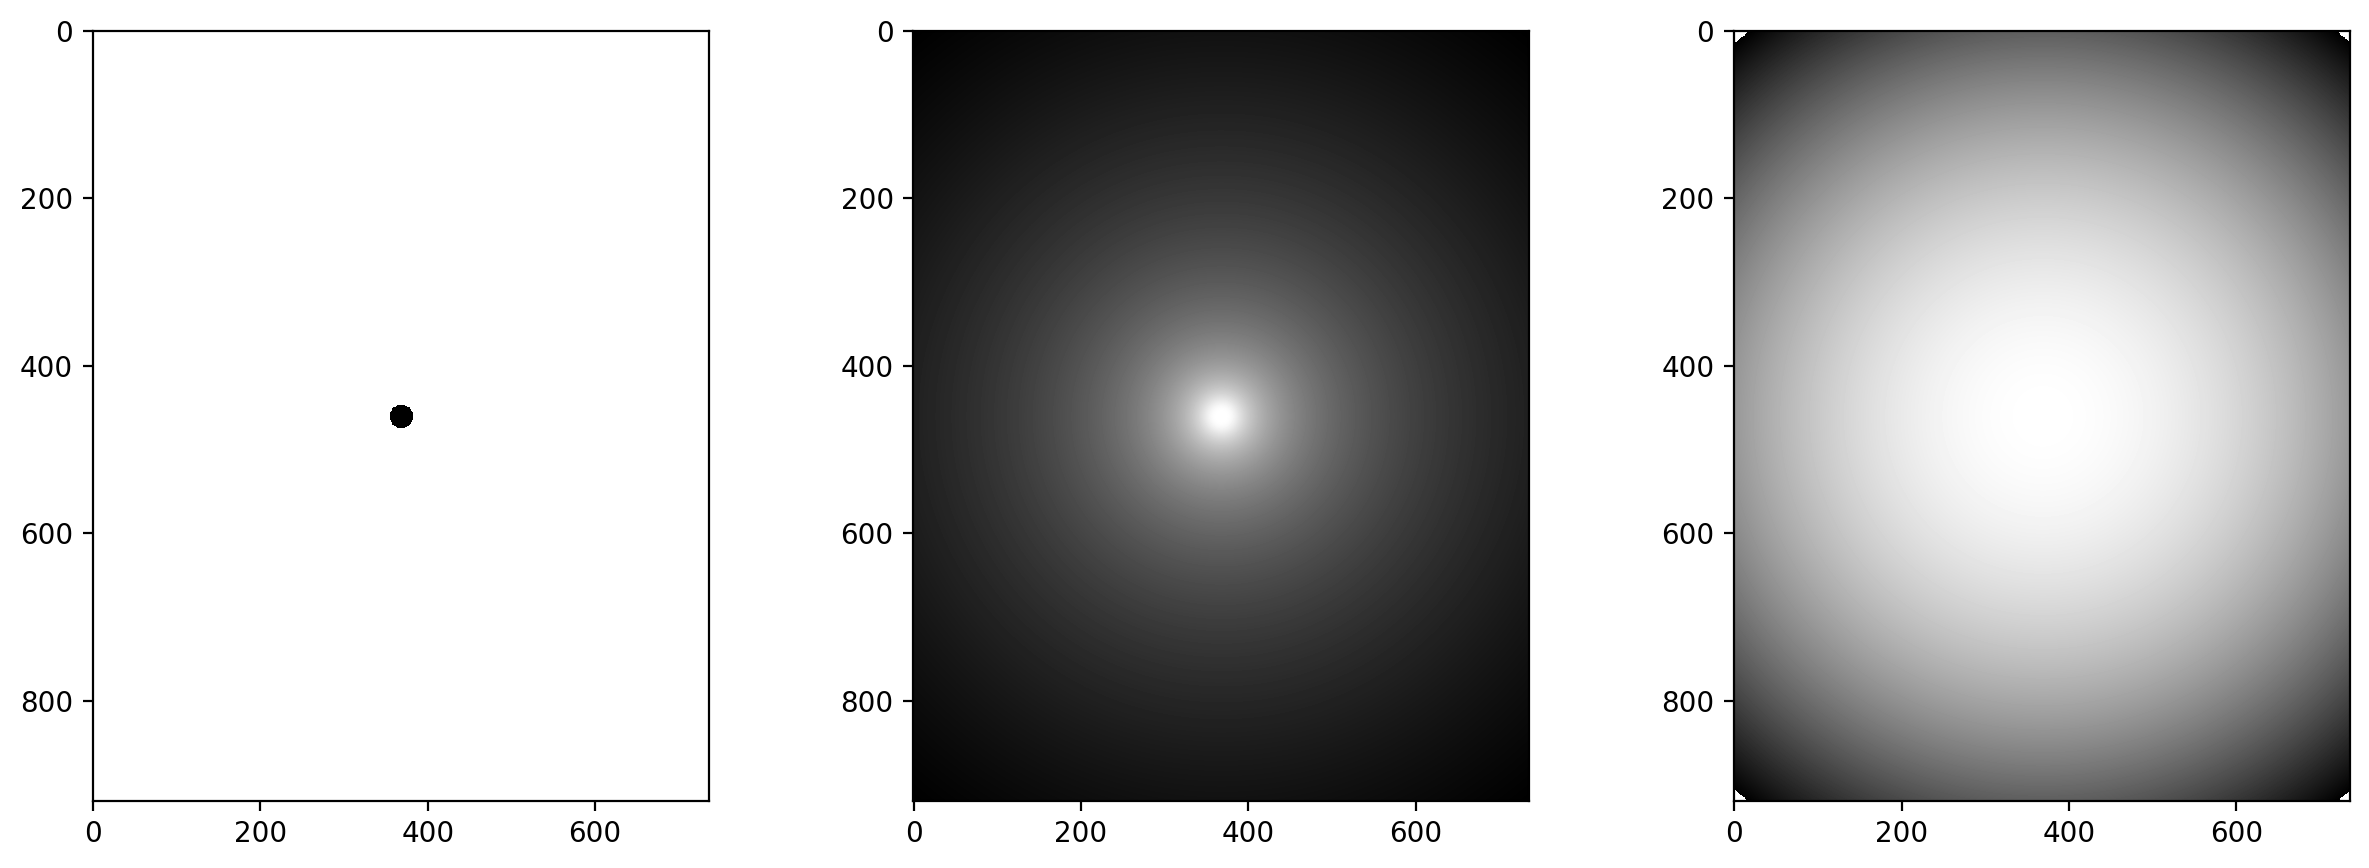

In [171]:
def s3s(i, b, g):
  plt.subplot(131); plt.imshow(magnitude(i), "gray")
  plt.subplot(132); plt.imshow(magnitude(b), "gray")
  plt.subplot(133); plt.imshow(magnitude(g), "gray")
  plt.show()

M, N = img.shape
D0 = 15; n = 2
i, b, g = (ILFF(M,N,D0), BLFF(M,N,D0,n), GLFF(M,N,D0))
s3s(i, b, g)

In [172]:
def chspec(spec, mask):
  fshift = spec * mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.abs(img_back)
  return (fshift, img_back)

# Результат наложения в виде спектра

<ipython-input-169-c957227c10be>:10: RuntimeWarning: divide by zero encountered in log
  return 20*np.log(np.abs(spec))


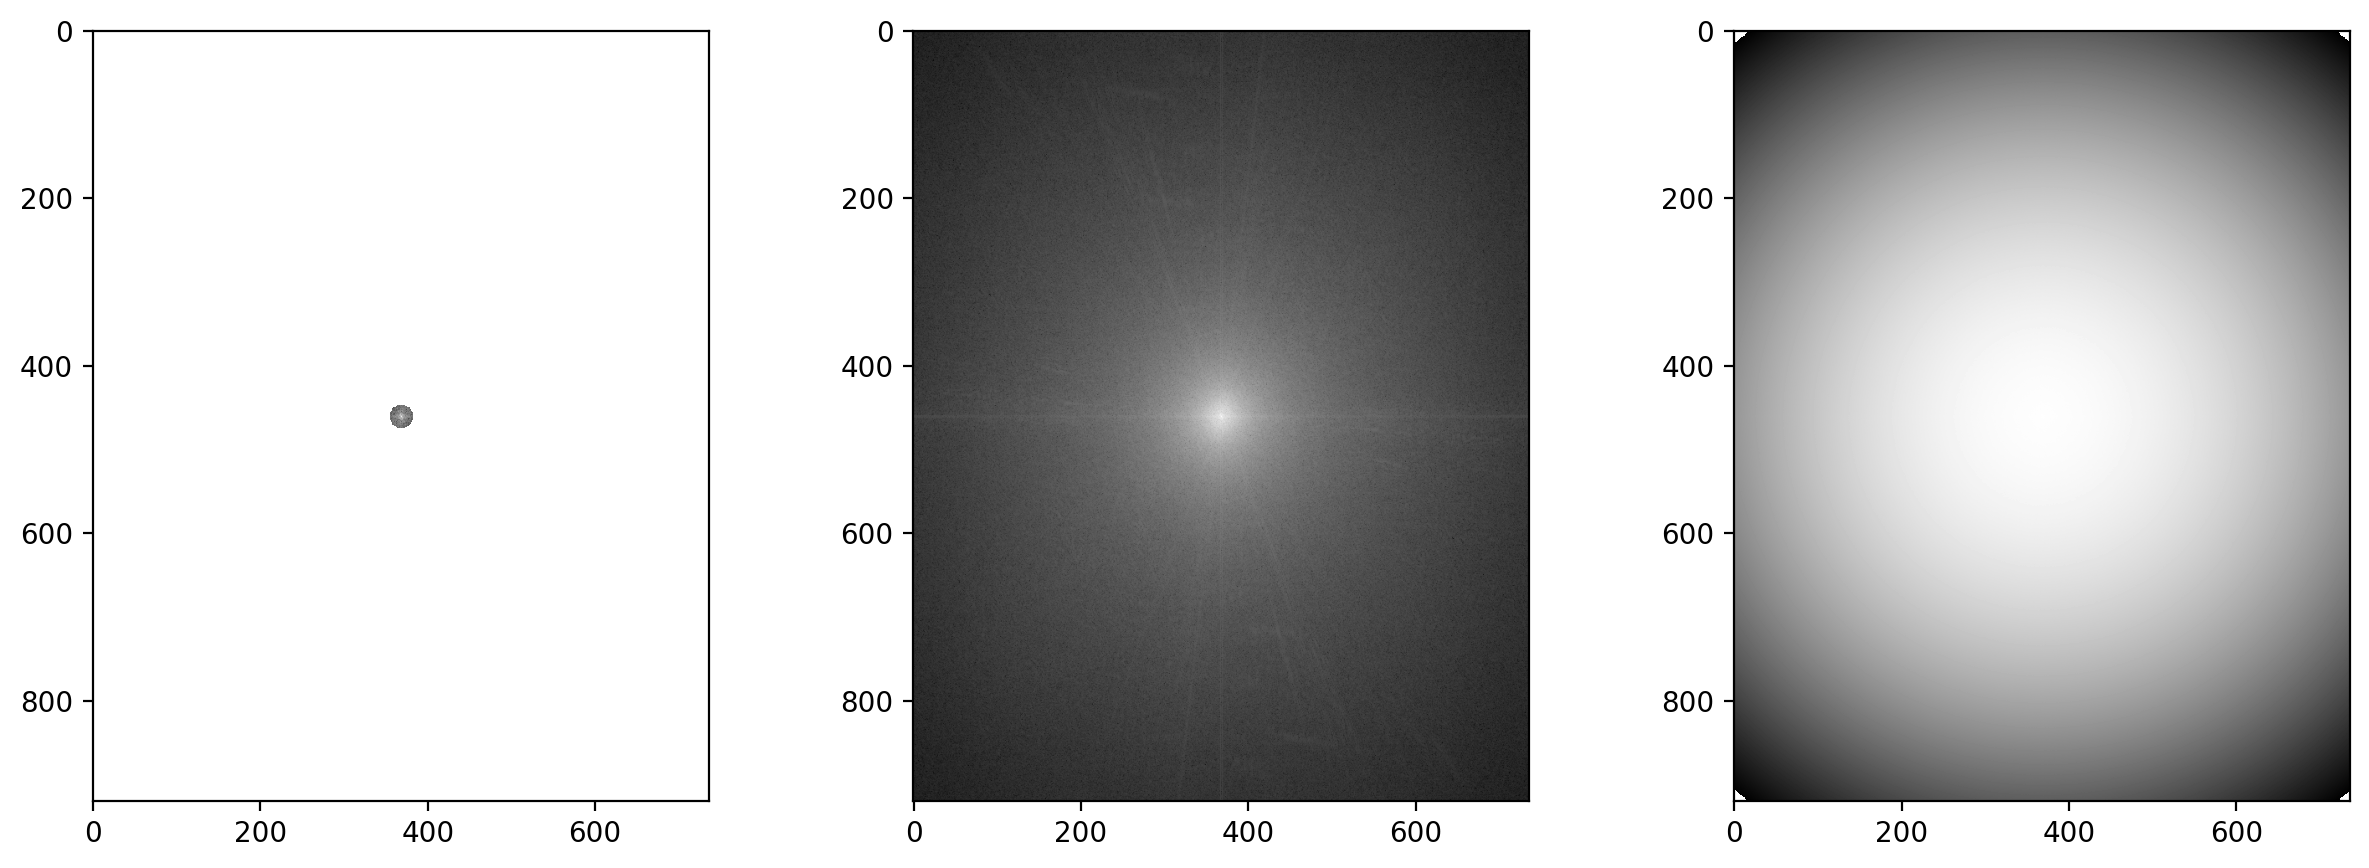

In [173]:
ispec, iimg = chspec(spec, i)
bspec, bimg = chspec(spec, b)
gspec, gimg = chspec(spec, g)
s3s(ispec, bspec, gspec)

# Результат наложения в виде изображения

In [174]:
def s3i(i, b, g):
  plt.rcParams["figure.figsize"] = (15, 5)
  plt.rcParams["figure.dpi"] = 200
  plt.subplot(131); plt.imshow(i, "gray")
  plt.subplot(132); plt.imshow(b, "gray")
  plt.subplot(133); plt.imshow(g, "gray")
  plt.show()

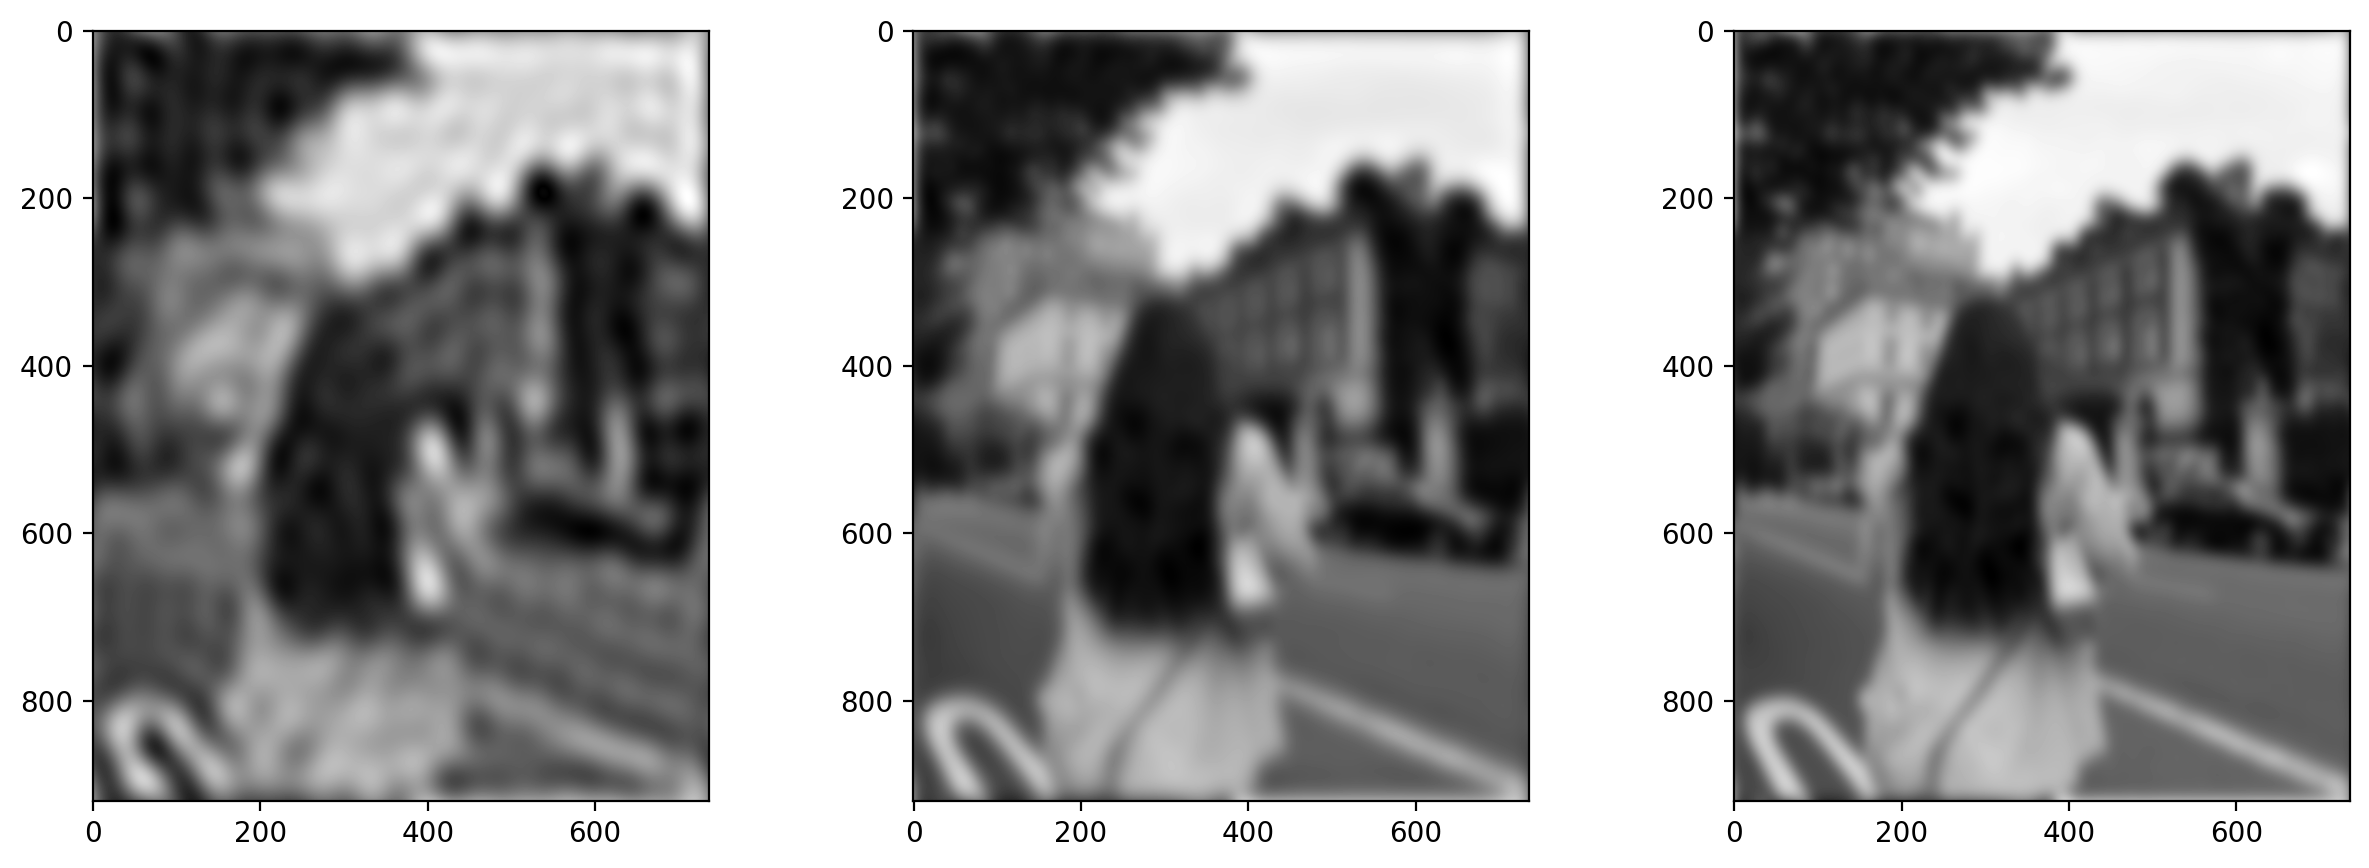

In [175]:
s3i(iimg, bimg, gimg)

# Частотный фильтр для повышения резкости

In [176]:
D0 = 15; n = 2
i, b, g = (IHFF(M,N,D0), BHFF(M,N,D0,n), GHFF(M,N,D0))

<ipython-input-169-c957227c10be>:10: RuntimeWarning: divide by zero encountered in log
  return 20*np.log(np.abs(spec))


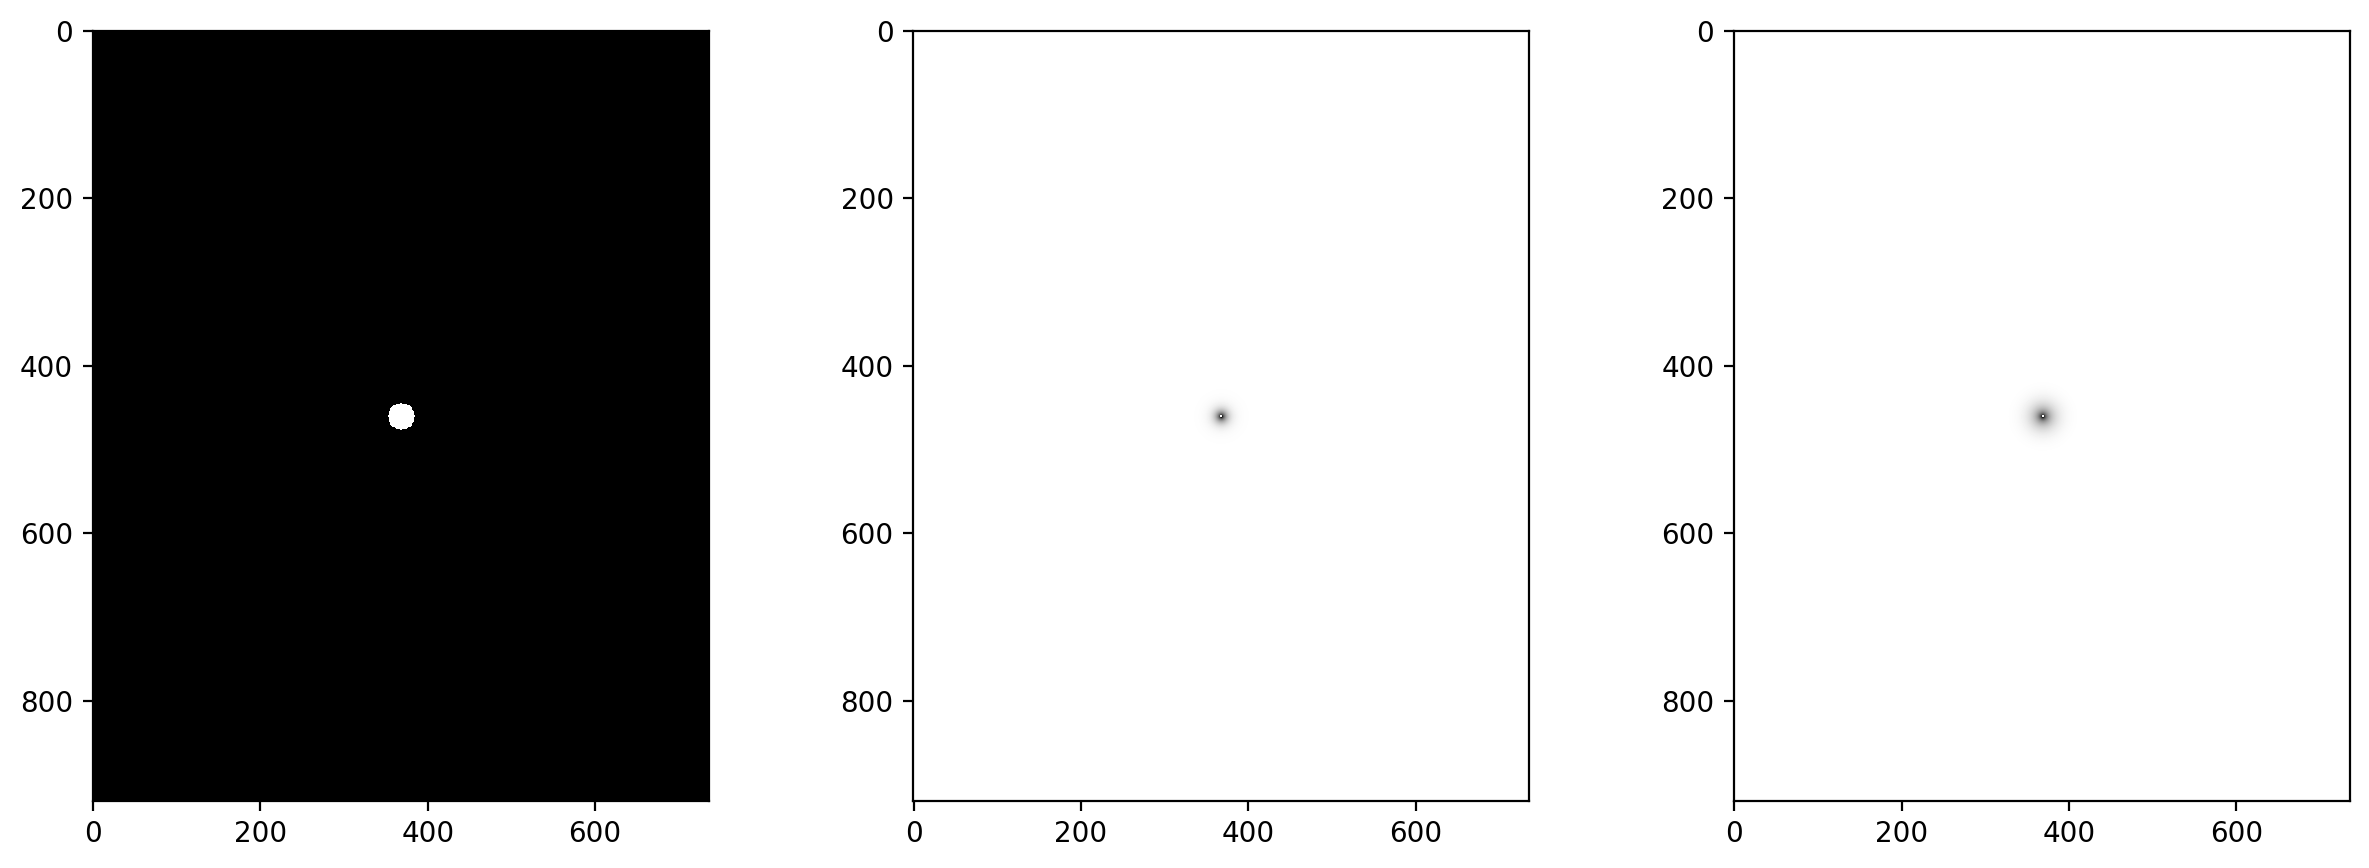

In [177]:
s3s(i, b, g)

In [178]:
  ispec, iimg = chspec(spec, i)
  bspec, bimg = chspec(spec, b)
  gspec, gimg = chspec(spec, g)

<ipython-input-169-c957227c10be>:10: RuntimeWarning: divide by zero encountered in log
  return 20*np.log(np.abs(spec))


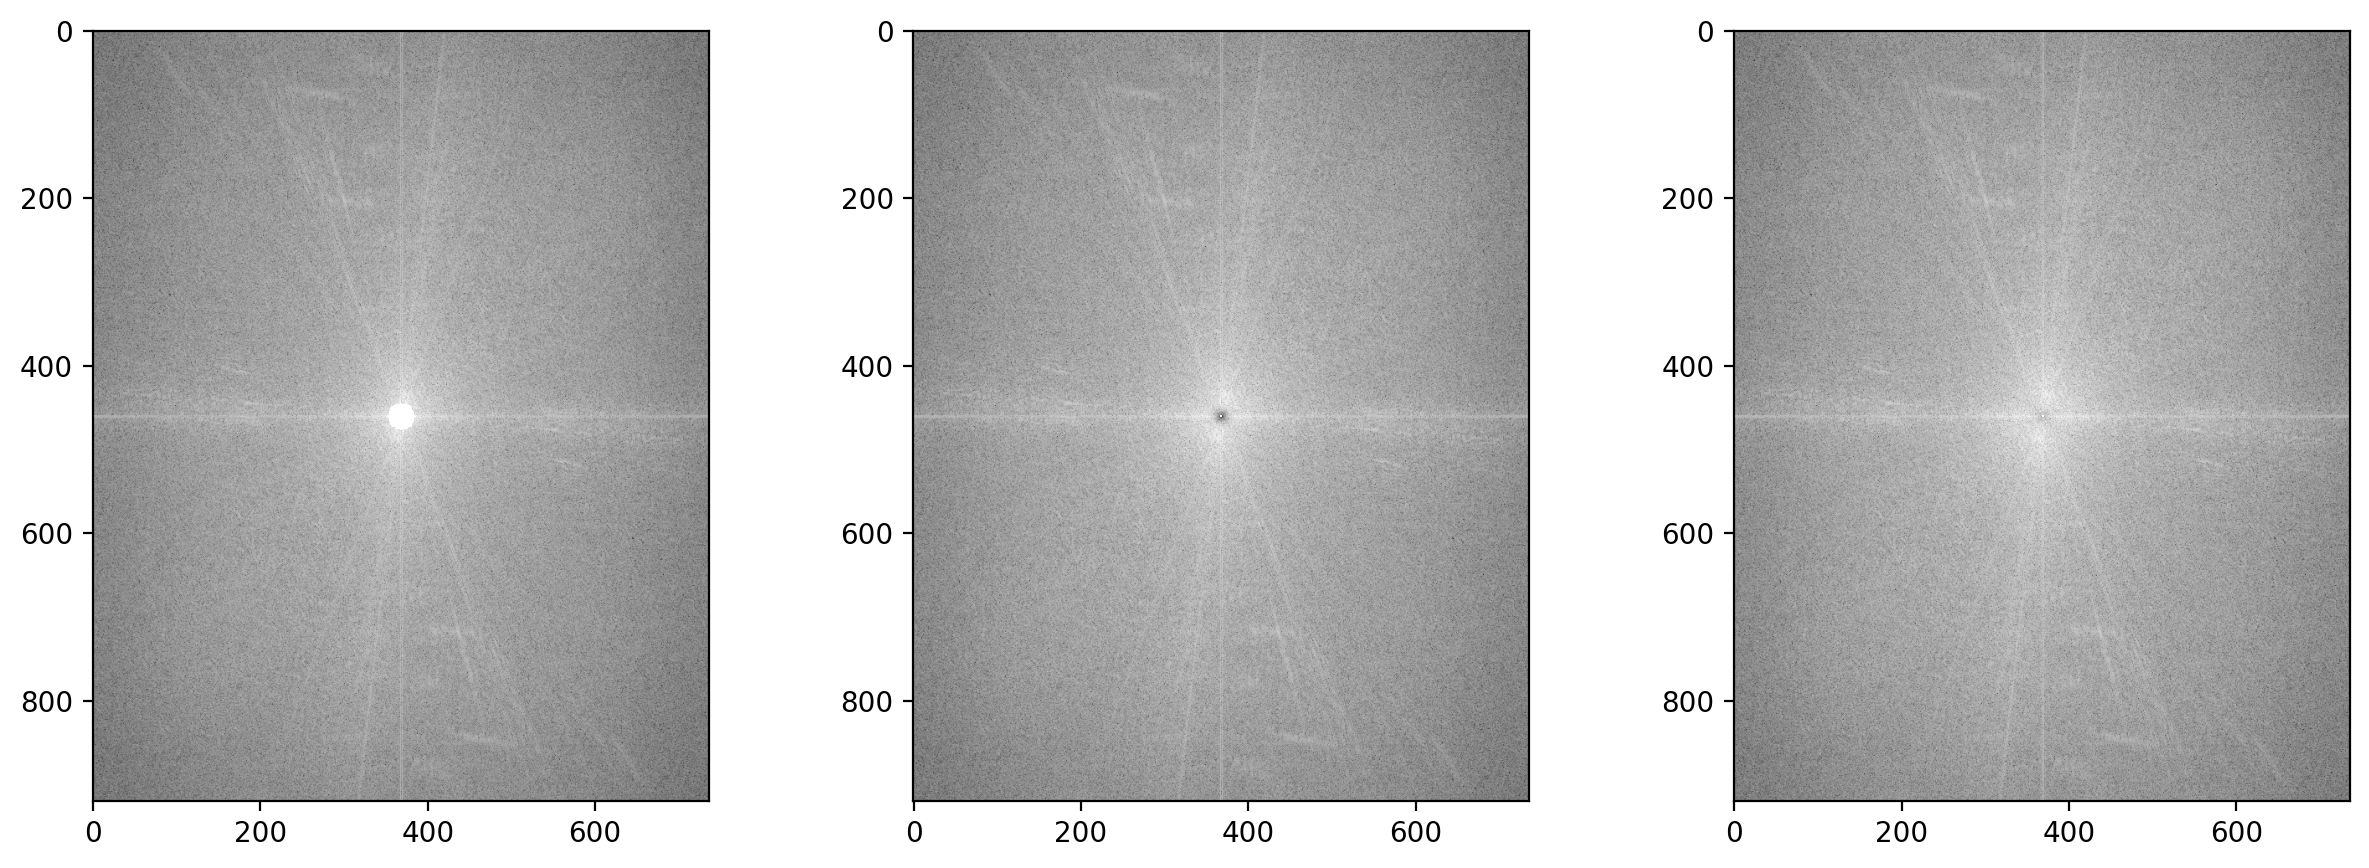

In [179]:
 s3s(ispec, bspec, gspec)

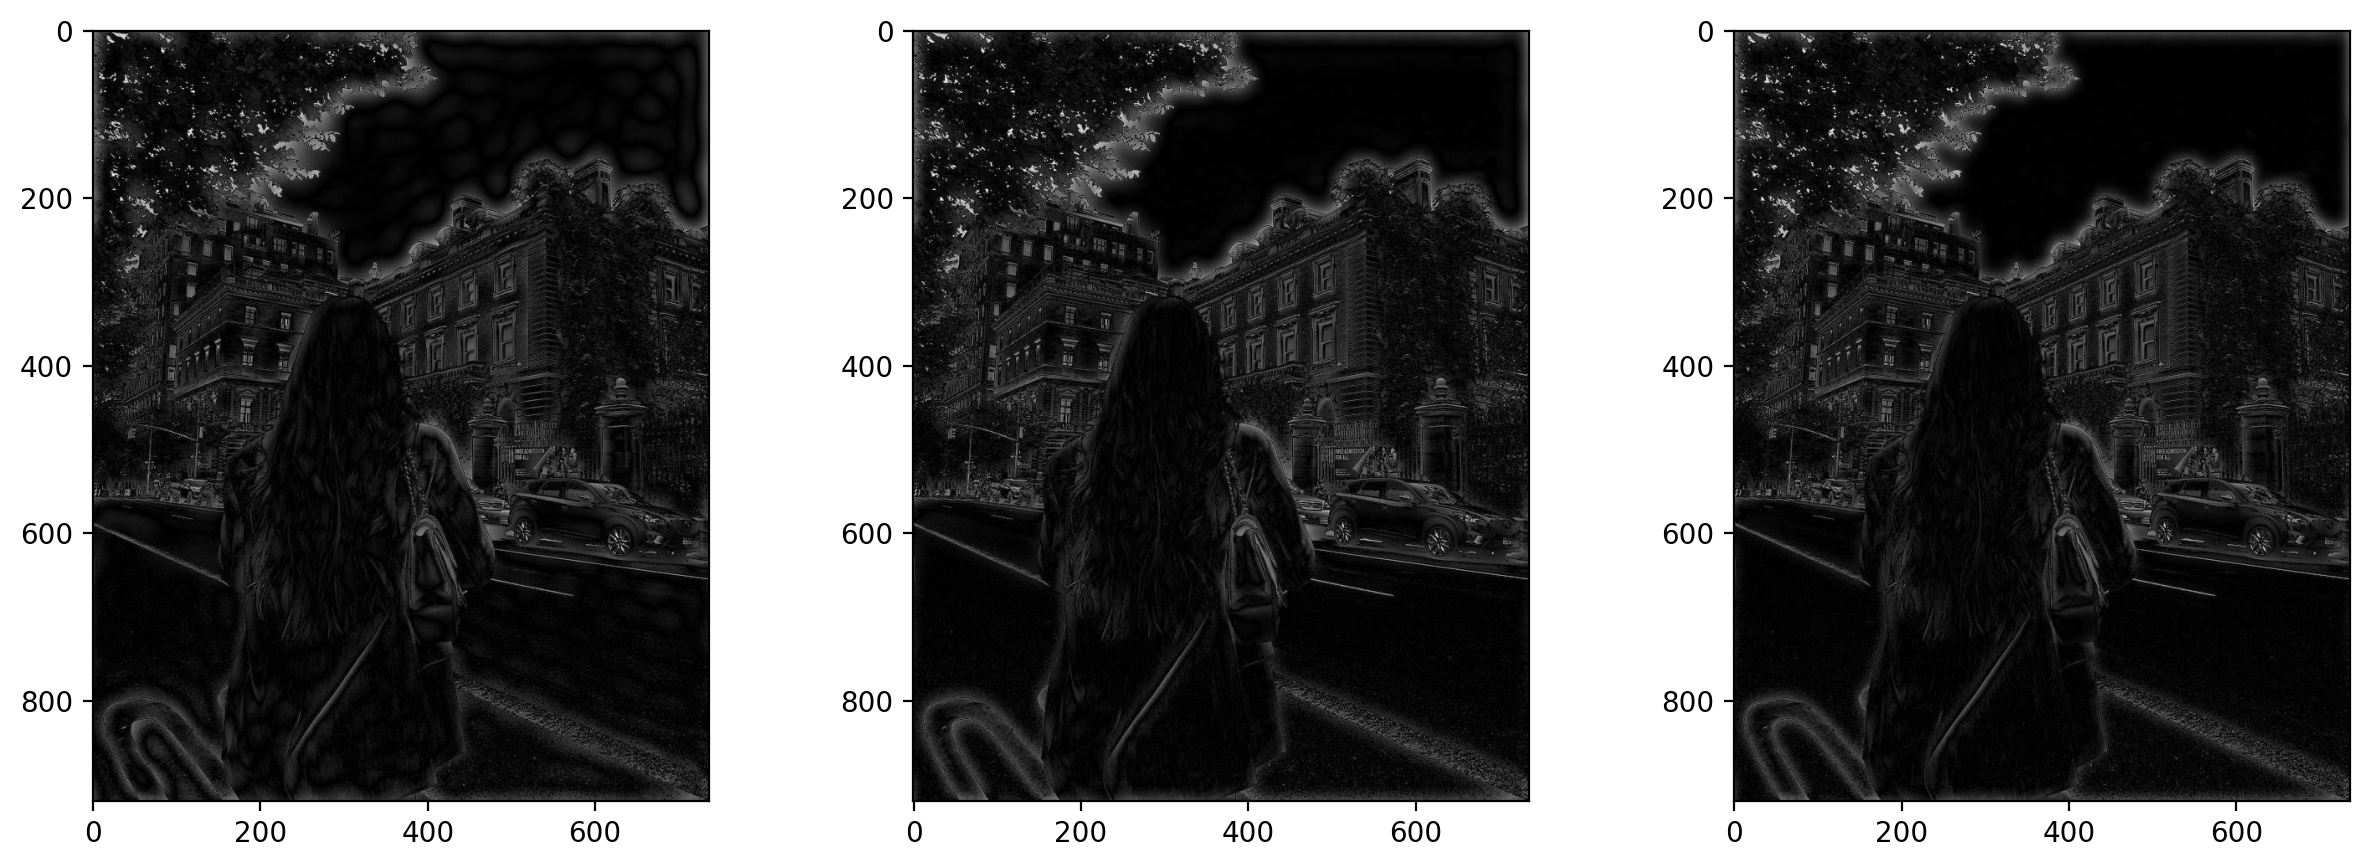

In [180]:
s3i(iimg, bimg, gimg)

In [181]:

 # Быстрое преобразование Фурье
f = np.fft.fft2(img)
 # Shift Frequency Переместите компонент постоянного тока на выходе БПФ в центр спектра.
fshift = np.fft.fftshift(f)
 # Логарифмическое преобразование
magnitude_spectrum = 20*np.log(np.abs(fshift))

 # Создать маску
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
 # Используйте маску для удаления низкочастотных компонентов
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
 # Логарифмическое преобразование
magnitude_spectrum1 = 20*np.log(np.abs(fshift))
 # Обратный сдвиг частоты
f_ishift = np.fft.ifftshift(fshift)
 # Обратное преобразование Фурье
img_back = np.fft.ifft2(f_ishift)
 # Принимаем абсолютное значение
img_back = np.abs(img_back)

<ipython-input-181-3b37417eb42f>:14: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum1 = 20*np.log(np.abs(fshift))


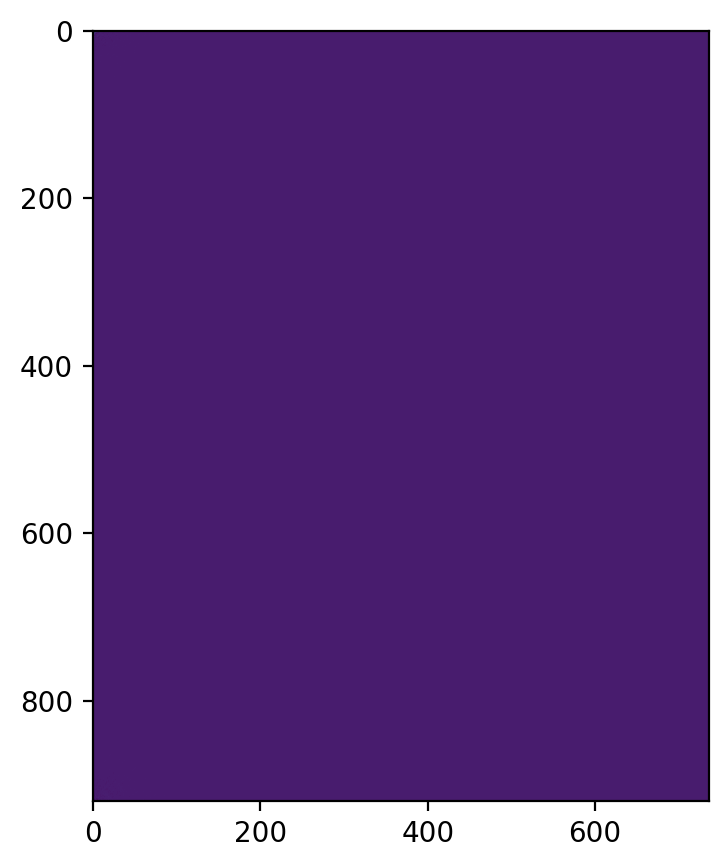

In [182]:

src = img.astype(np.float32)
dst = src.copy()
#plt.imshow(dst)
cv2.dft(src, dst,0,0)
plt.imshow(dst)